# EXPLORATION_SBA : 가위 바위 보 하기

## LOAD DATA

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

2.3.0


In [2]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
#!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
# 가위, 바위, 보 이미지를 불러와서 28x28 사이즈로 변경
import os
# 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_list = ['rock', 'scissor', 'paper']

for i in image_list:
    path = "/project/Aiffel/r_s_p/" +i
    image_dir_path = os.getenv("HOME") + path
    print("이미지 디렉토리 경로: ", image_dir_path)
    images=glob.glob(image_dir_path + "/*.jpg")  

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")

    print("%s 이미지 resize 완료!" %(i))

이미지 디렉토리 경로:  /home/theo/project/Aiffel/r_s_p/rock
rock 이미지 resize 완료!
이미지 디렉토리 경로:  /home/theo/project/Aiffel/r_s_p/scissor
scissor 이미지 resize 완료!
이미지 디렉토리 경로:  /home/theo/project/Aiffel/r_s_p/paper
paper 이미지 resize 완료!


In [3]:
img_path = "/home/theo/project/Aiffel/r_s_p/paper"
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=1200   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/project/Aiffel/r_s_p"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1200 입니다.
x_train shape: (1200, 28, 28, 3)
y_train shape: (1200,)


라벨:  2


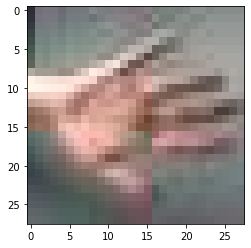

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1199])
print('라벨: ', y_train[1199])

In [5]:
# 순서대로 학습 데이터, 테스트 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_train_norm, y_train, test_size=0.25, shuffle=False)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(900, 28, 28, 3)
(300, 28, 28, 3)
(900,)
(300,)


In [6]:
# 무작위로 학습 데이터, 테스트 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_train_norm, y_train, test_size=0.25, shuffle=True, random_state=1000)

ValueError: Found input variables with inconsistent numbers of samples: [1200, 900]

In [7]:
# 학습용 데이터
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(900, 28, 28, 3)
(300, 28, 28, 3)
(900,)
(300,)


라벨:  2


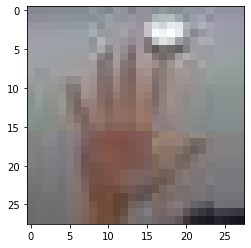

In [69]:
plt.imshow(X_train[0])
print('라벨: ', y_train[0])

# Model Train

In [90]:
n_channel_1=32
n_channel_2=128
n_dense=512
n_epochs = 15
n_class_num = 3

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(n_class_num, activation='softmax'))

model.summary()
model.compile(optimizer='adam',             
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_334"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_668 (Conv2D)          (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_668 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_669 (Conv2D)          (None, 11, 11, 128)       36992     
_________________________________________________________________
max_pooling2d_669 (MaxPoolin (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_334 (Flatten)        (None, 3200)              0         
_________________________________________________________________
dense_668 (Dense)            (None, 512)               1638912   
_________________________________________________________________
dense_669 (Dense)            (None, 3)              

In [91]:
model.fit(X_train, y_train, epochs=n_epochs)

print(X_train.shape)
print(y_train.shape)

Epoch 1/15
29/29 [==============================] - 1s 36ms/step - loss: 1.1200 - accuracy: 0.4078
Epoch 2/15
29/29 [==============================] - 2s 54ms/step - loss: 0.9537 - accuracy: 0.5711
Epoch 3/15
29/29 [==============================] - 2s 60ms/step - loss: 0.7528 - accuracy: 0.6978
Epoch 4/15
29/29 [==============================] - 2s 59ms/step - loss: 0.5710 - accuracy: 0.7856
Epoch 5/15
29/29 [==============================] - 2s 58ms/step - loss: 0.4261 - accuracy: 0.8411
Epoch 6/15
29/29 [==============================] - 2s 58ms/step - loss: 0.3666 - accuracy: 0.8733
Epoch 7/15
29/29 [==============================] - 2s 68ms/step - loss: 0.2246 - accuracy: 0.9222
Epoch 8/15
29/29 [==============================] - 2s 62ms/step - loss: 0.1944 - accuracy: 0.9378
Epoch 9/15
29/29 [==============================] - 2s 65ms/step - loss: 0.1435 - accuracy: 0.9533
Epoch 10/15
29/29 [==============================] - 2s 63ms/step - loss: 0.0815 - accuracy: 0.9800
Epoch 11/

In [92]:
# Model Test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.0413 - accuracy: 0.9933
test_loss: 0.04129026457667351 
test_accuracy: 0.9933333396911621


In [87]:
# 전수조사

In [89]:
for i in range(5,10):
    n_channel_1= 2**i
    for j in range(5,10):
        n_channel_2 = 2**j
        for k in range(5,10):
            n_dense= 2**k
            for l in [5,10,15]:
                n_epochs = l
                n_class_num = 3

                model=keras.models.Sequential()
                model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
                model.add(keras.layers.MaxPool2D(2,2))
                model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
                model.add(keras.layers.MaxPooling2D((2,2)))
                model.add(keras.layers.Flatten())
                model.add(keras.layers.Dense(n_dense, activation='relu'))
                model.add(keras.layers.Dense(n_class_num, activation='softmax'))
                
                model.compile(optimizer='adam',             
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
                
                # Model train
                model.fit(X_train, y_train, epochs=n_epochs)
                print('n_channel_1: ', n_channel_1)
                print('n_channel_2: ', n_channel_2)
                print('n_dense: ', n_dense)
                print('n_epochs: ', n_epochs)
                
                # Model Test
                test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
                print("test_loss: {} ".format(test_loss))
                print("test_accuracy: {}".format(test_accuracy))
                

Epoch 1/5
29/29 [==============================] - 1s 26ms/step - loss: 1.0982 - accuracy: 0.3578
Epoch 2/5
29/29 [==============================] - 1s 23ms/step - loss: 1.0853 - accuracy: 0.3678
Epoch 3/5
29/29 [==============================] - 1s 28ms/step - loss: 1.0412 - accuracy: 0.4933
Epoch 4/5
29/29 [==============================] - 1s 27ms/step - loss: 0.9512 - accuracy: 0.5744
Epoch 5/5
29/29 [==============================] - 1s 28ms/step - loss: 0.8615 - accuracy: 0.6478
n_channel_1:  32
n_channel_2:  32
n_dense:  32
n_epochs:  5
10/10 - 0s - loss: 0.8839 - accuracy: 0.5367
test_loss: 0.8838546872138977 
test_accuracy: 0.5366666913032532
Epoch 1/10
29/29 [==============================] - 1s 23ms/step - loss: 1.0919 - accuracy: 0.3556
Epoch 2/10
29/29 [==============================] - 1s 34ms/step - loss: 1.0403 - accuracy: 0.5111
Epoch 3/10
29/29 [==============================] - 1s 27ms/step - loss: 0.9356 - accuracy: 0.5967
Epoch 4/10
29/29 [=========================

29/29 [==============================] - 1s 25ms/step - loss: 0.5321 - accuracy: 0.7967
Epoch 7/15
29/29 [==============================] - 1s 30ms/step - loss: 0.4034 - accuracy: 0.8656
Epoch 8/15
29/29 [==============================] - 1s 33ms/step - loss: 0.3104 - accuracy: 0.8978
Epoch 9/15
29/29 [==============================] - 1s 35ms/step - loss: 0.2539 - accuracy: 0.9211
Epoch 10/15
29/29 [==============================] - 1s 35ms/step - loss: 0.1744 - accuracy: 0.9500
Epoch 11/15
29/29 [==============================] - 1s 34ms/step - loss: 0.1476 - accuracy: 0.9544
Epoch 12/15
29/29 [==============================] - 1s 36ms/step - loss: 0.1524 - accuracy: 0.9411
Epoch 13/15
29/29 [==============================] - 1s 36ms/step - loss: 0.0929 - accuracy: 0.9778
Epoch 14/15
29/29 [==============================] - 1s 42ms/step - loss: 0.0661 - accuracy: 0.9822
Epoch 15/15
29/29 [==============================] - 1s 32ms/step - loss: 0.0615 - accuracy: 0.9867
n_channel_1:  3

29/29 [==============================] - 1s 41ms/step - loss: 0.3199 - accuracy: 0.8944
Epoch 7/10
29/29 [==============================] - 1s 47ms/step - loss: 0.2064 - accuracy: 0.9311
Epoch 8/10
29/29 [==============================] - 1s 46ms/step - loss: 0.2927 - accuracy: 0.8822
Epoch 9/10
29/29 [==============================] - 1s 47ms/step - loss: 0.1452 - accuracy: 0.9567
Epoch 10/10
29/29 [==============================] - 1s 46ms/step - loss: 0.1033 - accuracy: 0.9667
n_channel_1:  32
n_channel_2:  64
n_dense:  512
n_epochs:  10
10/10 - 0s - loss: 0.1725 - accuracy: 0.9267
test_loss: 0.1724880337715149 
test_accuracy: 0.9266666769981384
Epoch 1/15
29/29 [==============================] - 1s 47ms/step - loss: 1.0987 - accuracy: 0.4089
Epoch 2/15
29/29 [==============================] - 1s 49ms/step - loss: 0.9453 - accuracy: 0.5622
Epoch 3/15
29/29 [==============================] - 1s 45ms/step - loss: 0.7279 - accuracy: 0.7111
Epoch 4/15
29/29 [============================

29/29 [==============================] - 2s 68ms/step - loss: 1.1301 - accuracy: 0.3633
Epoch 2/5
29/29 [==============================] - 2s 63ms/step - loss: 1.0171 - accuracy: 0.5333
Epoch 3/5
29/29 [==============================] - 2s 60ms/step - loss: 0.8797 - accuracy: 0.5889
Epoch 4/5
29/29 [==============================] - 2s 61ms/step - loss: 0.7428 - accuracy: 0.7144
Epoch 5/5
29/29 [==============================] - 2s 62ms/step - loss: 0.5391 - accuracy: 0.8244
n_channel_1:  32
n_channel_2:  128
n_dense:  512
n_epochs:  5
10/10 - 0s - loss: 0.5355 - accuracy: 0.8267
test_loss: 0.5355312824249268 
test_accuracy: 0.8266666531562805
Epoch 1/10
29/29 [==============================] - 2s 60ms/step - loss: 1.1119 - accuracy: 0.3800
Epoch 2/10
29/29 [==============================] - 2s 60ms/step - loss: 0.9551 - accuracy: 0.5333
Epoch 3/10
29/29 [==============================] - 2s 60ms/step - loss: 0.7886 - accuracy: 0.6711
Epoch 4/10
29/29 [==============================] -

29/29 [==============================] - 2s 74ms/step - loss: 0.2750 - accuracy: 0.9033
Epoch 7/15
29/29 [==============================] - 2s 81ms/step - loss: 0.1801 - accuracy: 0.9511
Epoch 8/15
29/29 [==============================] - 2s 66ms/step - loss: 0.1154 - accuracy: 0.9689
Epoch 9/15
29/29 [==============================] - 2s 66ms/step - loss: 0.0842 - accuracy: 0.9800
Epoch 10/15
29/29 [==============================] - 2s 71ms/step - loss: 0.0822 - accuracy: 0.9767
Epoch 11/15
29/29 [==============================] - 2s 59ms/step - loss: 0.0857 - accuracy: 0.9756
Epoch 12/15
29/29 [==============================] - 2s 69ms/step - loss: 0.0352 - accuracy: 0.9967
Epoch 13/15
29/29 [==============================] - 2s 67ms/step - loss: 0.0224 - accuracy: 0.9967
Epoch 14/15
29/29 [==============================] - 2s 59ms/step - loss: 0.0187 - accuracy: 0.9989
Epoch 15/15
29/29 [==============================] - 2s 70ms/step - loss: 0.0138 - accuracy: 0.9989
n_channel_1:  3

29/29 [==============================] - 3s 108ms/step - loss: 0.2670 - accuracy: 0.9144
Epoch 7/10
29/29 [==============================] - 3s 114ms/step - loss: 0.3288 - accuracy: 0.8778
Epoch 8/10
29/29 [==============================] - 3s 113ms/step - loss: 0.1861 - accuracy: 0.9378
Epoch 9/10
29/29 [==============================] - 4s 121ms/step - loss: 0.1422 - accuracy: 0.9467
Epoch 10/10
29/29 [==============================] - 4s 133ms/step - loss: 0.1033 - accuracy: 0.9644
n_channel_1:  32
n_channel_2:  512
n_dense:  256
n_epochs:  10
10/10 - 0s - loss: 0.2426 - accuracy: 0.8867
test_loss: 0.24260671436786652 
test_accuracy: 0.8866666555404663
Epoch 1/15
29/29 [==============================] - 3s 106ms/step - loss: 1.1418 - accuracy: 0.3689
Epoch 2/15
29/29 [==============================] - 3s 110ms/step - loss: 1.0252 - accuracy: 0.5122
Epoch 3/15
29/29 [==============================] - 3s 113ms/step - loss: 0.8722 - accuracy: 0.6333
Epoch 4/15
29/29 [==================

29/29 [==============================] - 1s 43ms/step - loss: 0.7894 - accuracy: 0.6722
Epoch 7/15
29/29 [==============================] - 1s 42ms/step - loss: 0.6916 - accuracy: 0.7267
Epoch 8/15
29/29 [==============================] - 1s 49ms/step - loss: 0.5745 - accuracy: 0.8211
Epoch 9/15
29/29 [==============================] - 1s 42ms/step - loss: 0.4857 - accuracy: 0.8433
Epoch 10/15
29/29 [==============================] - 1s 37ms/step - loss: 0.4357 - accuracy: 0.8433
Epoch 11/15
29/29 [==============================] - 1s 35ms/step - loss: 0.3775 - accuracy: 0.8689
Epoch 12/15
29/29 [==============================] - 1s 40ms/step - loss: 0.3279 - accuracy: 0.8944
Epoch 13/15
29/29 [==============================] - 1s 38ms/step - loss: 0.2701 - accuracy: 0.9144
Epoch 14/15
29/29 [==============================] - 1s 34ms/step - loss: 0.2128 - accuracy: 0.9389
Epoch 15/15
29/29 [==============================] - 1s 42ms/step - loss: 0.1754 - accuracy: 0.9433
n_channel_1:  6

29/29 [==============================] - 2s 52ms/step - loss: 0.7582 - accuracy: 0.6622
Epoch 7/10
29/29 [==============================] - 2s 55ms/step - loss: 0.7243 - accuracy: 0.6822
Epoch 8/10
29/29 [==============================] - 2s 55ms/step - loss: 0.6679 - accuracy: 0.7200
Epoch 9/10
29/29 [==============================] - 2s 63ms/step - loss: 0.6055 - accuracy: 0.7678
Epoch 10/10
29/29 [==============================] - 2s 55ms/step - loss: 0.5020 - accuracy: 0.8300
n_channel_1:  64
n_channel_2:  64
n_dense:  32
n_epochs:  10
10/10 - 0s - loss: 0.5867 - accuracy: 0.7833
test_loss: 0.5866683721542358 
test_accuracy: 0.7833333611488342
Epoch 1/15
29/29 [==============================] - 1s 49ms/step - loss: 1.1051 - accuracy: 0.3311
Epoch 2/15
29/29 [==============================] - 2s 52ms/step - loss: 1.0889 - accuracy: 0.3944
Epoch 3/15
29/29 [==============================] - 1s 50ms/step - loss: 1.0479 - accuracy: 0.5122
Epoch 4/15
29/29 [=============================

29/29 [==============================] - 2s 64ms/step - loss: 1.1066 - accuracy: 0.3200
Epoch 2/5
29/29 [==============================] - 2s 65ms/step - loss: 1.0847 - accuracy: 0.3967
Epoch 3/5
29/29 [==============================] - 2s 62ms/step - loss: 1.0044 - accuracy: 0.5456
Epoch 4/5
29/29 [==============================] - 2s 67ms/step - loss: 0.8737 - accuracy: 0.6256
Epoch 5/5
29/29 [==============================] - 2s 67ms/step - loss: 0.7290 - accuracy: 0.7344
n_channel_1:  64
n_channel_2:  128
n_dense:  32
n_epochs:  5
10/10 - 0s - loss: 0.7281 - accuracy: 0.7267
test_loss: 0.7281336784362793 
test_accuracy: 0.7266666889190674
Epoch 1/10
29/29 [==============================] - 2s 69ms/step - loss: 1.0929 - accuracy: 0.3556
Epoch 2/10
29/29 [==============================] - 2s 74ms/step - loss: 0.9987 - accuracy: 0.4889
Epoch 3/10
29/29 [==============================] - 2s 63ms/step - loss: 0.9033 - accuracy: 0.5711
Epoch 4/10
29/29 [==============================] - 

29/29 [==============================] - 2s 72ms/step - loss: 0.3152 - accuracy: 0.8922
Epoch 7/15
29/29 [==============================] - 2s 62ms/step - loss: 0.2448 - accuracy: 0.9144
Epoch 8/15
29/29 [==============================] - 2s 61ms/step - loss: 0.1613 - accuracy: 0.9556
Epoch 9/15
29/29 [==============================] - 2s 68ms/step - loss: 0.1634 - accuracy: 0.9367
Epoch 10/15
29/29 [==============================] - 2s 67ms/step - loss: 0.0900 - accuracy: 0.9667
Epoch 11/15
29/29 [==============================] - 2s 60ms/step - loss: 0.0573 - accuracy: 0.9811
Epoch 12/15
29/29 [==============================] - 2s 63ms/step - loss: 0.0419 - accuracy: 0.9933
Epoch 13/15
29/29 [==============================] - 2s 62ms/step - loss: 0.0308 - accuracy: 0.9956
Epoch 14/15
29/29 [==============================] - 2s 66ms/step - loss: 0.1195 - accuracy: 0.9578
Epoch 15/15
29/29 [==============================] - 2s 63ms/step - loss: 0.0351 - accuracy: 0.9944
n_channel_1:  6

29/29 [==============================] - 3s 100ms/step - loss: 0.3572 - accuracy: 0.8878
Epoch 7/10
29/29 [==============================] - 3s 96ms/step - loss: 0.2980 - accuracy: 0.8922
Epoch 8/10
29/29 [==============================] - 3s 97ms/step - loss: 0.2226 - accuracy: 0.9333
Epoch 9/10
29/29 [==============================] - 3s 98ms/step - loss: 0.1311 - accuracy: 0.9600
Epoch 10/10
29/29 [==============================] - 3s 111ms/step - loss: 0.0955 - accuracy: 0.9767
n_channel_1:  64
n_channel_2:  256
n_dense:  512
n_epochs:  10
10/10 - 0s - loss: 0.1287 - accuracy: 0.9467
test_loss: 0.12874336540699005 
test_accuracy: 0.9466666579246521
Epoch 1/15
29/29 [==============================] - 3s 92ms/step - loss: 1.0996 - accuracy: 0.3967
Epoch 2/15
29/29 [==============================] - 3s 96ms/step - loss: 0.9492 - accuracy: 0.5400
Epoch 3/15
29/29 [==============================] - 3s 90ms/step - loss: 0.7774 - accuracy: 0.6778
Epoch 4/15
29/29 [========================

29/29 [==============================] - 3s 112ms/step - loss: 0.4488 - accuracy: 0.8367
Epoch 7/15
29/29 [==============================] - 3s 119ms/step - loss: 0.2906 - accuracy: 0.9100
Epoch 8/15
29/29 [==============================] - 4s 135ms/step - loss: 0.2730 - accuracy: 0.9111
Epoch 9/15
29/29 [==============================] - 3s 108ms/step - loss: 0.1730 - accuracy: 0.9456
Epoch 10/15
29/29 [==============================] - 3s 109ms/step - loss: 0.1494 - accuracy: 0.9478
Epoch 11/15
29/29 [==============================] - 4s 128ms/step - loss: 0.1137 - accuracy: 0.9644
Epoch 12/15
29/29 [==============================] - 3s 109ms/step - loss: 0.1252 - accuracy: 0.9700
Epoch 13/15
29/29 [==============================] - 3s 118ms/step - loss: 0.0845 - accuracy: 0.9756
Epoch 14/15
29/29 [==============================] - 4s 130ms/step - loss: 0.0653 - accuracy: 0.9856
Epoch 15/15
29/29 [==============================] - 3s 113ms/step - loss: 0.0598 - accuracy: 0.9844
n_cha

29/29 [==============================] - 6s 210ms/step - loss: 1.1055 - accuracy: 0.4033
Epoch 2/5
29/29 [==============================] - 6s 209ms/step - loss: 0.9040 - accuracy: 0.5778
Epoch 3/5
29/29 [==============================] - 7s 227ms/step - loss: 0.7156 - accuracy: 0.6978
Epoch 4/5
29/29 [==============================] - 6s 207ms/step - loss: 0.4975 - accuracy: 0.8344
Epoch 5/5
29/29 [==============================] - 6s 207ms/step - loss: 0.4789 - accuracy: 0.8289
n_channel_1:  64
n_channel_2:  512
n_dense:  512
n_epochs:  5
10/10 - 0s - loss: 0.3953 - accuracy: 0.8500
test_loss: 0.39534154534339905 
test_accuracy: 0.8500000238418579
Epoch 1/10
29/29 [==============================] - 6s 218ms/step - loss: 1.1348 - accuracy: 0.3111
Epoch 2/10
29/29 [==============================] - 6s 213ms/step - loss: 1.0126 - accuracy: 0.5022
Epoch 3/10
29/29 [==============================] - 6s 216ms/step - loss: 0.8012 - accuracy: 0.6644
Epoch 4/10
29/29 [========================

29/29 [==============================] - 2s 63ms/step - loss: 0.7366 - accuracy: 0.7011
Epoch 7/15
29/29 [==============================] - 2s 68ms/step - loss: 0.6381 - accuracy: 0.7533
Epoch 8/15
29/29 [==============================] - 2s 77ms/step - loss: 0.5277 - accuracy: 0.8111
Epoch 9/15
29/29 [==============================] - 2s 69ms/step - loss: 0.4479 - accuracy: 0.8456
Epoch 10/15
29/29 [==============================] - 2s 66ms/step - loss: 0.3675 - accuracy: 0.8644
Epoch 11/15
29/29 [==============================] - 2s 72ms/step - loss: 0.3005 - accuracy: 0.8911
Epoch 12/15
29/29 [==============================] - 2s 73ms/step - loss: 0.2434 - accuracy: 0.9189
Epoch 13/15
29/29 [==============================] - 2s 74ms/step - loss: 0.2139 - accuracy: 0.9278
Epoch 14/15
29/29 [==============================] - 2s 70ms/step - loss: 0.1651 - accuracy: 0.9378
Epoch 15/15
29/29 [==============================] - 2s 71ms/step - loss: 0.1163 - accuracy: 0.9589
n_channel_1:  1

29/29 [==============================] - 2s 70ms/step - loss: 0.5880 - accuracy: 0.7844
Epoch 7/10
29/29 [==============================] - 2s 68ms/step - loss: 0.5553 - accuracy: 0.7800
Epoch 8/10
29/29 [==============================] - 2s 69ms/step - loss: 0.3984 - accuracy: 0.8611
Epoch 9/10
29/29 [==============================] - 2s 71ms/step - loss: 0.3857 - accuracy: 0.8633
Epoch 10/10
29/29 [==============================] - 2s 77ms/step - loss: 0.3151 - accuracy: 0.8844
n_channel_1:  128
n_channel_2:  64
n_dense:  256
n_epochs:  10
10/10 - 0s - loss: 0.3915 - accuracy: 0.8567
test_loss: 0.3915119767189026 
test_accuracy: 0.8566666841506958
Epoch 1/15
29/29 [==============================] - 2s 76ms/step - loss: 1.0999 - accuracy: 0.3433
Epoch 2/15
29/29 [==============================] - 2s 68ms/step - loss: 1.0160 - accuracy: 0.5056
Epoch 3/15
29/29 [==============================] - 2s 68ms/step - loss: 0.9367 - accuracy: 0.5433
Epoch 4/15
29/29 [===========================

29/29 [==============================] - 3s 113ms/step - loss: 1.1141 - accuracy: 0.3633
Epoch 2/5
29/29 [==============================] - 4s 128ms/step - loss: 1.0177 - accuracy: 0.4933
Epoch 3/5
29/29 [==============================] - 4s 122ms/step - loss: 0.8872 - accuracy: 0.6111
Epoch 4/5
29/29 [==============================] - 3s 120ms/step - loss: 0.7779 - accuracy: 0.6878
Epoch 5/5
29/29 [==============================] - 3s 118ms/step - loss: 0.6443 - accuracy: 0.7556
n_channel_1:  128
n_channel_2:  128
n_dense:  256
n_epochs:  5
10/10 - 0s - loss: 0.6104 - accuracy: 0.7933
test_loss: 0.6103549003601074 
test_accuracy: 0.7933333516120911
Epoch 1/10
29/29 [==============================] - 3s 116ms/step - loss: 1.0958 - accuracy: 0.3722
Epoch 2/10
29/29 [==============================] - 4s 125ms/step - loss: 0.9753 - accuracy: 0.5400
Epoch 3/10
29/29 [==============================] - 4s 127ms/step - loss: 0.8792 - accuracy: 0.6078
Epoch 4/10
29/29 [========================

29/29 [==============================] - 5s 174ms/step - loss: 0.8261 - accuracy: 0.6444
Epoch 7/10
29/29 [==============================] - 5s 181ms/step - loss: 0.6732 - accuracy: 0.7378
Epoch 8/10
29/29 [==============================] - 6s 194ms/step - loss: 0.6109 - accuracy: 0.7800
Epoch 9/10
29/29 [==============================] - 5s 171ms/step - loss: 0.4946 - accuracy: 0.8178
Epoch 10/10
29/29 [==============================] - 5s 173ms/step - loss: 0.3755 - accuracy: 0.8756
n_channel_1:  128
n_channel_2:  256
n_dense:  32
n_epochs:  10
10/10 - 0s - loss: 0.4136 - accuracy: 0.8867
test_loss: 0.4136294424533844 
test_accuracy: 0.8866666555404663
Epoch 1/15
29/29 [==============================] - 5s 173ms/step - loss: 1.1018 - accuracy: 0.3878
Epoch 2/15
29/29 [==============================] - 6s 197ms/step - loss: 1.0769 - accuracy: 0.4278
Epoch 3/15
29/29 [==============================] - 5s 164ms/step - loss: 1.0100 - accuracy: 0.5022
Epoch 4/15
29/29 [===================

10/10 - 0s - loss: 0.0227 - accuracy: 0.9933
test_loss: 0.02271677739918232 
test_accuracy: 0.9933333396911621
Epoch 1/5
29/29 [==============================] - 8s 273ms/step - loss: 1.1066 - accuracy: 0.3367
Epoch 2/5
29/29 [==============================] - 7s 246ms/step - loss: 1.0603 - accuracy: 0.4533
Epoch 3/5
29/29 [==============================] - 8s 265ms/step - loss: 0.9126 - accuracy: 0.5789
Epoch 4/5
29/29 [==============================] - 7s 243ms/step - loss: 0.8076 - accuracy: 0.6578
Epoch 5/5
29/29 [==============================] - 8s 262ms/step - loss: 0.6334 - accuracy: 0.7478
n_channel_1:  128
n_channel_2:  512
n_dense:  32
n_epochs:  5
10/10 - 1s - loss: 0.6901 - accuracy: 0.7800
test_loss: 0.6901282668113708 
test_accuracy: 0.7799999713897705
Epoch 1/10
29/29 [==============================] - 7s 245ms/step - loss: 1.0996 - accuracy: 0.3478
Epoch 2/10
29/29 [==============================] - 7s 250ms/step - loss: 1.0188 - accuracy: 0.4911
Epoch 3/10
29/29 [====

29/29 [==============================] - 10s 329ms/step - loss: 0.8724 - accuracy: 0.6178
Epoch 4/15
29/29 [==============================] - 9s 305ms/step - loss: 0.6963 - accuracy: 0.7300
Epoch 5/15
29/29 [==============================] - 10s 354ms/step - loss: 0.5942 - accuracy: 0.7756
Epoch 6/15
29/29 [==============================] - 8s 272ms/step - loss: 0.4407 - accuracy: 0.8444
Epoch 7/15
29/29 [==============================] - 8s 269ms/step - loss: 0.2935 - accuracy: 0.9000
Epoch 8/15
29/29 [==============================] - 8s 266ms/step - loss: 0.2433 - accuracy: 0.9122
Epoch 9/15
29/29 [==============================] - 7s 245ms/step - loss: 0.2586 - accuracy: 0.9111
Epoch 10/15
29/29 [==============================] - 7s 255ms/step - loss: 0.1852 - accuracy: 0.9378
Epoch 11/15
29/29 [==============================] - 8s 277ms/step - loss: 0.1013 - accuracy: 0.9744
Epoch 12/15
29/29 [==============================] - 7s 245ms/step - loss: 0.0582 - accuracy: 0.9833
Epoch 

29/29 [==============================] - 3s 93ms/step - loss: 1.0332 - accuracy: 0.5078
Epoch 4/10
29/29 [==============================] - 3s 92ms/step - loss: 0.9287 - accuracy: 0.5678
Epoch 5/10
29/29 [==============================] - 3s 93ms/step - loss: 0.8763 - accuracy: 0.6178
Epoch 6/10
29/29 [==============================] - 3s 95ms/step - loss: 0.7799 - accuracy: 0.6556
Epoch 7/10
29/29 [==============================] - 3s 101ms/step - loss: 0.7359 - accuracy: 0.6756
Epoch 8/10
29/29 [==============================] - 3s 107ms/step - loss: 0.6477 - accuracy: 0.7467
Epoch 9/10
29/29 [==============================] - 3s 92ms/step - loss: 0.5879 - accuracy: 0.7822
Epoch 10/10
29/29 [==============================] - 3s 93ms/step - loss: 0.5249 - accuracy: 0.8111
n_channel_1:  256
n_channel_2:  32
n_dense:  512
n_epochs:  10
10/10 - 0s - loss: 0.5448 - accuracy: 0.8133
test_loss: 0.5447587966918945 
test_accuracy: 0.8133333325386047
Epoch 1/15
29/29 [=========================

29/29 [==============================] - 4s 121ms/step - loss: 0.1030 - accuracy: 0.9700
Epoch 15/15
29/29 [==============================] - 4s 124ms/step - loss: 0.0947 - accuracy: 0.9700
n_channel_1:  256
n_channel_2:  64
n_dense:  256
n_epochs:  15
10/10 - 0s - loss: 0.1405 - accuracy: 0.9633
test_loss: 0.14052994549274445 
test_accuracy: 0.9633333086967468
Epoch 1/5
29/29 [==============================] - 3s 116ms/step - loss: 1.1087 - accuracy: 0.3378
Epoch 2/5
29/29 [==============================] - 3s 117ms/step - loss: 1.0989 - accuracy: 0.3378
Epoch 3/5
29/29 [==============================] - 3s 116ms/step - loss: 1.0839 - accuracy: 0.4556
Epoch 4/5
29/29 [==============================] - 3s 116ms/step - loss: 0.9745 - accuracy: 0.5333
Epoch 5/5
29/29 [==============================] - 4s 122ms/step - loss: 0.8079 - accuracy: 0.6511
n_channel_1:  256
n_channel_2:  64
n_dense:  512
n_epochs:  5
10/10 - 0s - loss: 0.8797 - accuracy: 0.6333
test_loss: 0.8797217607498169 
tes

29/29 [==============================] - 5s 160ms/step - loss: 1.0817 - accuracy: 0.3967
Epoch 2/15
29/29 [==============================] - 5s 164ms/step - loss: 0.9525 - accuracy: 0.5567
Epoch 3/15
29/29 [==============================] - 5s 185ms/step - loss: 0.7690 - accuracy: 0.6844
Epoch 4/15
29/29 [==============================] - 5s 158ms/step - loss: 0.6050 - accuracy: 0.7656
Epoch 5/15
29/29 [==============================] - 5s 160ms/step - loss: 0.4801 - accuracy: 0.8256
Epoch 6/15
29/29 [==============================] - 5s 170ms/step - loss: 0.3175 - accuracy: 0.8911
Epoch 7/15
29/29 [==============================] - 6s 193ms/step - loss: 0.2443 - accuracy: 0.9122
Epoch 8/15
29/29 [==============================] - 5s 159ms/step - loss: 0.1656 - accuracy: 0.9422
Epoch 9/15
29/29 [==============================] - 5s 160ms/step - loss: 0.1602 - accuracy: 0.9367
Epoch 10/15
29/29 [==============================] - 5s 166ms/step - loss: 0.1357 - accuracy: 0.9600
Epoch 11/1

10/10 - 1s - loss: 0.5816 - accuracy: 0.7800
test_loss: 0.5816218852996826 
test_accuracy: 0.7799999713897705
Epoch 1/10
29/29 [==============================] - 12s 397ms/step - loss: 1.1153 - accuracy: 0.3656
Epoch 2/10
29/29 [==============================] - 11s 378ms/step - loss: 1.0222 - accuracy: 0.4844
Epoch 3/10
29/29 [==============================] - 12s 418ms/step - loss: 0.9013 - accuracy: 0.5478
Epoch 4/10
29/29 [==============================] - 11s 395ms/step - loss: 0.8084 - accuracy: 0.6400
Epoch 5/10
29/29 [==============================] - 12s 428ms/step - loss: 0.6388 - accuracy: 0.7778
Epoch 6/10
29/29 [==============================] - 11s 396ms/step - loss: 0.6608 - accuracy: 0.7578
Epoch 7/10
29/29 [==============================] - 12s 422ms/step - loss: 0.4467 - accuracy: 0.8467
Epoch 8/10
29/29 [==============================] - 12s 400ms/step - loss: 0.3586 - accuracy: 0.8711
Epoch 9/10
29/29 [==============================] - 12s 407ms/step - loss: 0.2601 

KeyboardInterrupt: 

# 최적값
n_channel_1=32
n_channel_2=128
n_dense=512
n_epochs = 15

# 잘못 추론한 경우 확인

In [93]:
predicted_result = model.predict(X_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=100  #100번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.9974757e-01 2.5186269e-04 5.6196814e-07]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


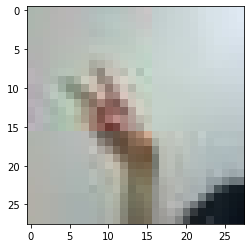

In [94]:
plt.imshow(X_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.6894531  0.2429761  0.06757069]
라벨: 1, 예측결과: 0


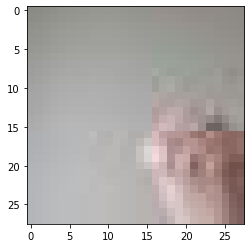

예측확률분포: [0.6894531  0.2429761  0.06757069]
라벨: 1, 예측결과: 0


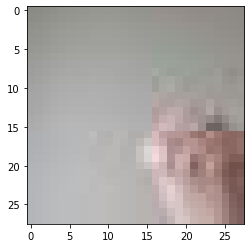

예측확률분포: [0.6698065  0.23940836 0.09078515]
라벨: 1, 예측결과: 0


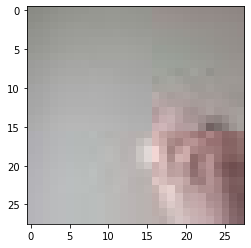

예측확률분포: [0.6698065  0.23940836 0.09078515]
라벨: 1, 예측결과: 0


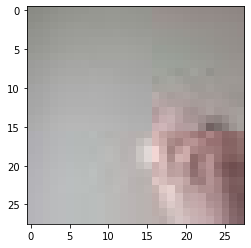

예측확률분포: [0.6698065  0.23940836 0.09078515]
라벨: 1, 예측결과: 0


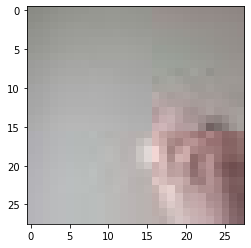

예측확률분포: [0.6698065  0.23940836 0.09078515]
라벨: 1, 예측결과: 0


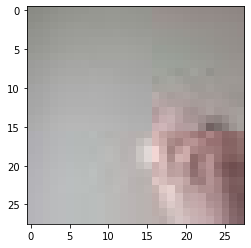

예측확률분포: [0.6894531  0.2429761  0.06757069]
라벨: 1, 예측결과: 0


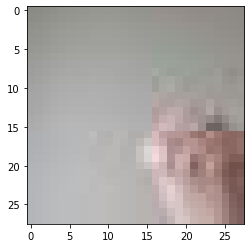

예측확률분포: [0.6698065  0.23940836 0.09078515]
라벨: 1, 예측결과: 0


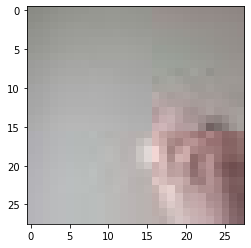

예측확률분포: [0.6698065  0.23940836 0.09078515]
라벨: 1, 예측결과: 0


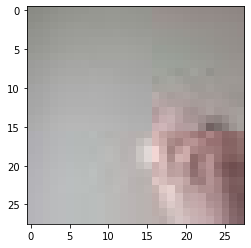

예측확률분포: [0.6894531  0.2429761  0.06757069]
라벨: 1, 예측결과: 0


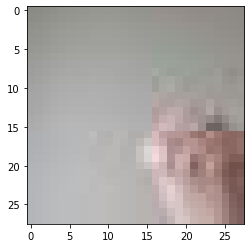

예측확률분포: [0.6698065  0.23940836 0.09078515]
라벨: 1, 예측결과: 0


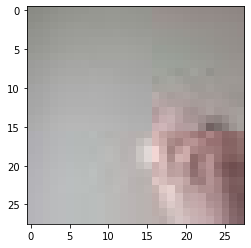

예측확률분포: [0.6698065  0.23940836 0.09078515]
라벨: 1, 예측결과: 0


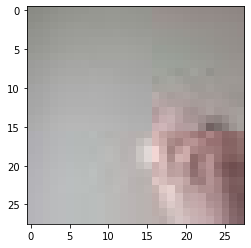

예측확률분포: [0.6894531  0.2429761  0.06757069]
라벨: 1, 예측결과: 0


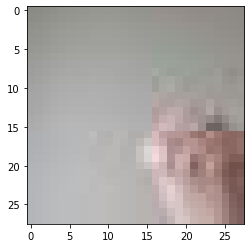

예측확률분포: [0.6698065  0.23940836 0.09078515]
라벨: 1, 예측결과: 0


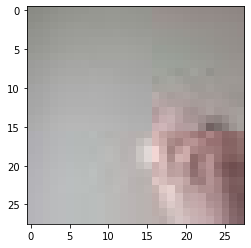

예측확률분포: [0.6894531  0.2429761  0.06757069]
라벨: 1, 예측결과: 0


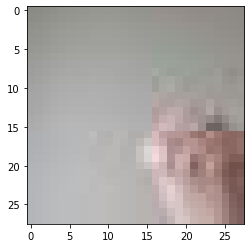

예측확률분포: [0.6698065  0.23940836 0.09078515]
라벨: 1, 예측결과: 0


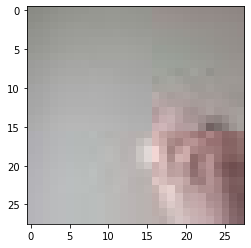

예측확률분포: [0.6894531  0.2429761  0.06757069]
라벨: 1, 예측결과: 0


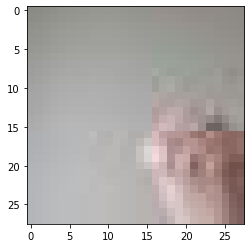

예측확률분포: [0.6698065  0.23940836 0.09078515]
라벨: 1, 예측결과: 0


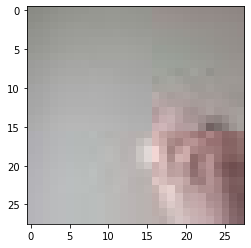

예측확률분포: [0.6894531  0.2429761  0.06757069]
라벨: 1, 예측결과: 0


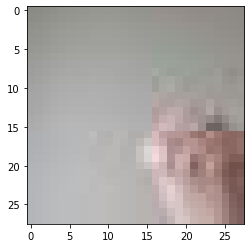

예측확률분포: [0.6894531  0.2429761  0.06757069]
라벨: 1, 예측결과: 0


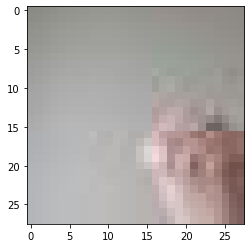

In [95]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 20개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=20)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(X_test[n], cmap=plt.cm.binary)
    plt.show()